In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('CarPrice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


#### Encoding Categorical Variables

In [7]:
pd.unique(df['fueltype'])

array(['gas', 'diesel'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
enc_df = df.copy()

In [11]:
categorical_cols = enc_df.select_dtypes(include='object').columns
numerical_cols = enc_df.select_dtypes(exclude='object').columns

In [12]:
for col in categorical_cols:
    enc_df[col] = le.fit_transform(enc_df[col])

### Finding relationship between enginesize and car price

In [15]:
# Extract the features
X = enc_df.drop('price', axis=1)
y = enc_df[['price']]

In [16]:
import seaborn as sns

In [17]:
corr_matrix = enc_df.corr(numeric_only=True)

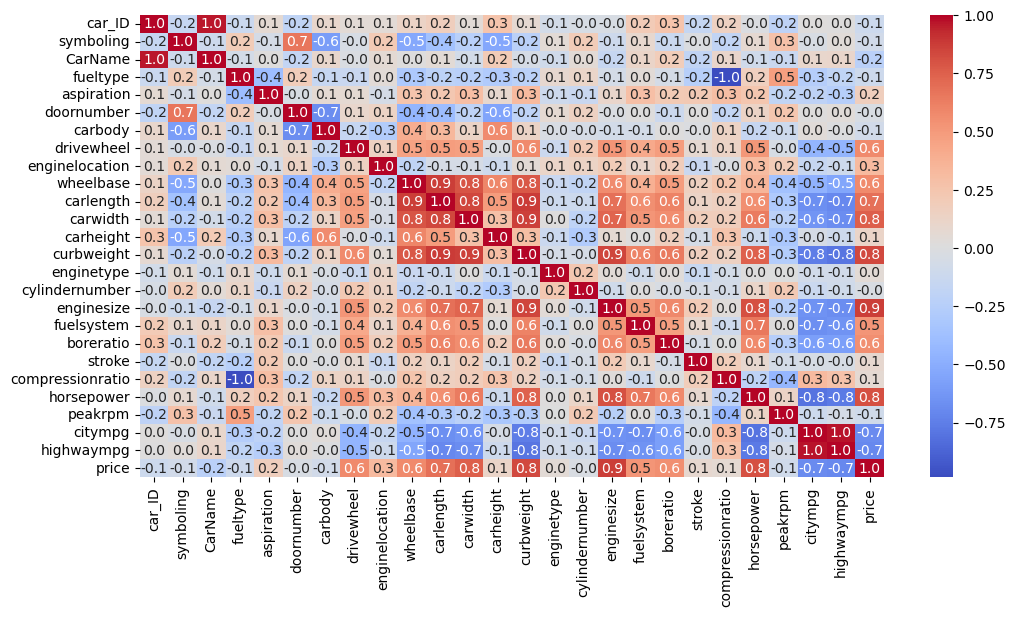

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [21]:
# Identify highly correlated values
corr_with_target = corr_matrix['price'].sort_values(ascending=False)
corr_with_target

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
cylindernumber     -0.027628
doornumber         -0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
car_ID             -0.109093
CarName            -0.231439
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

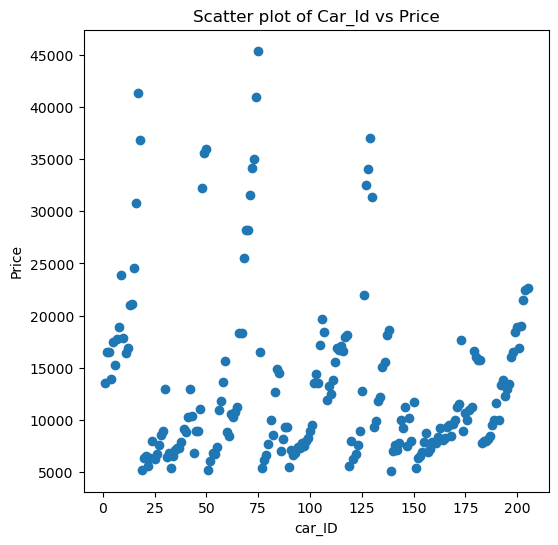

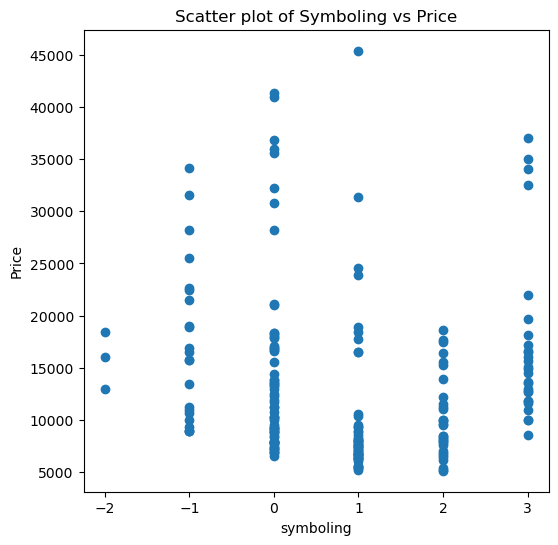

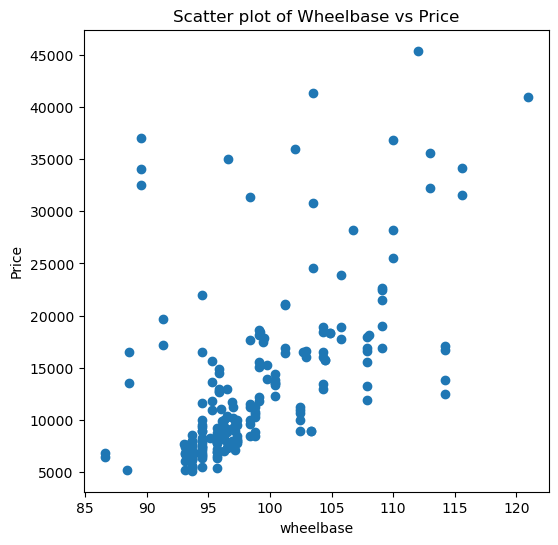

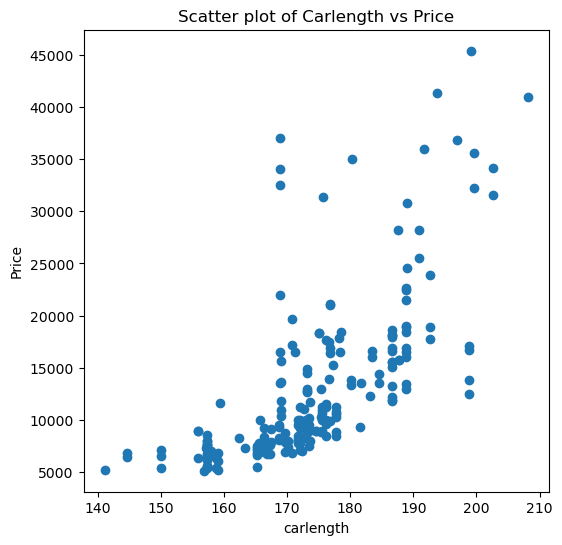

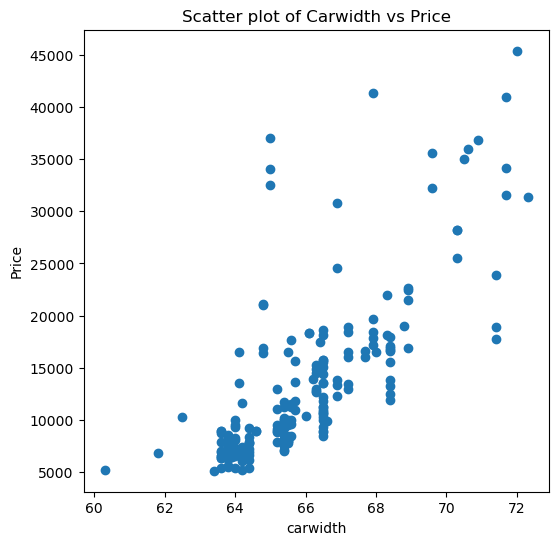

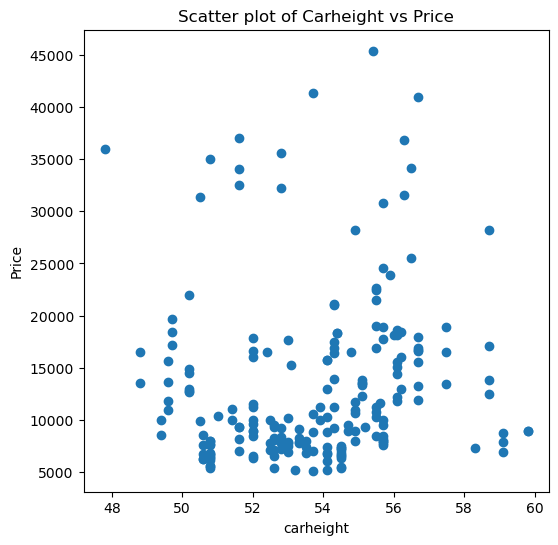

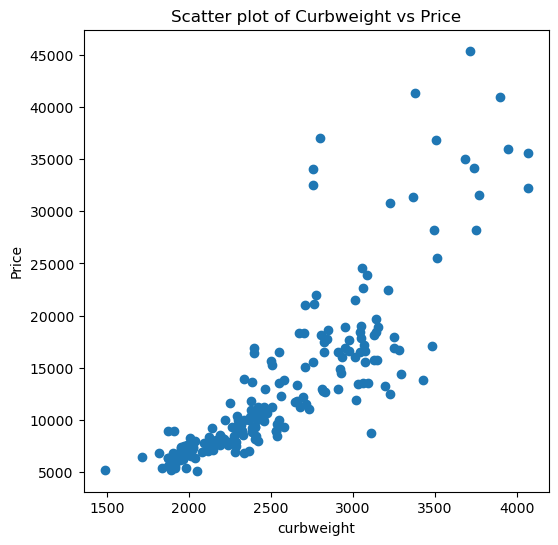

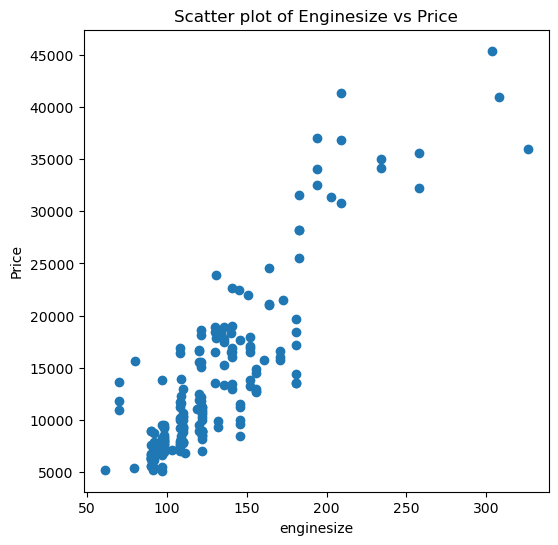

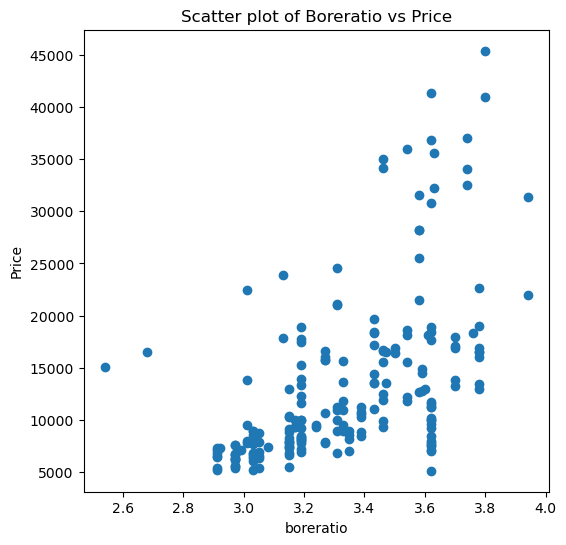

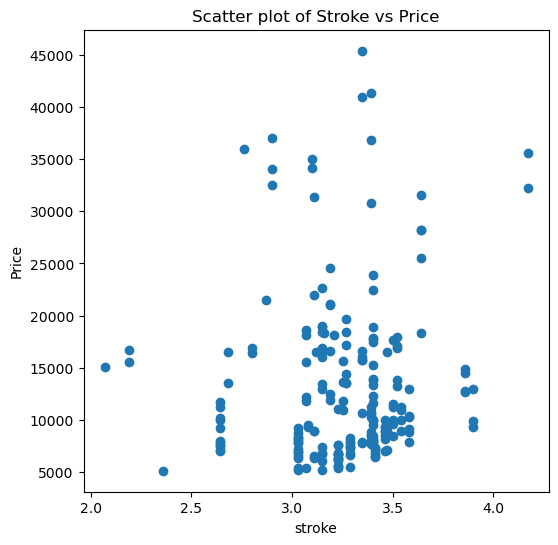

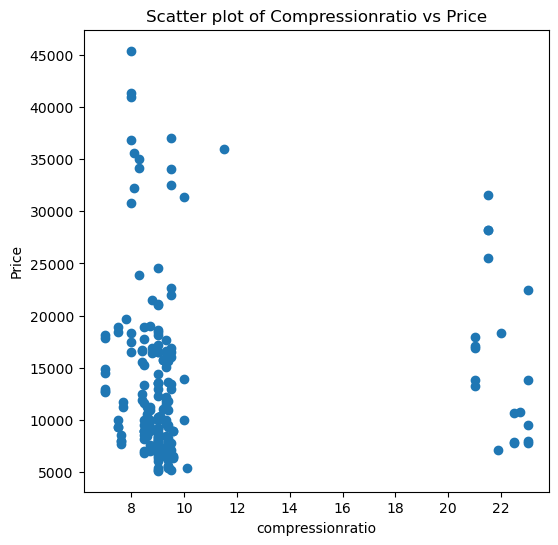

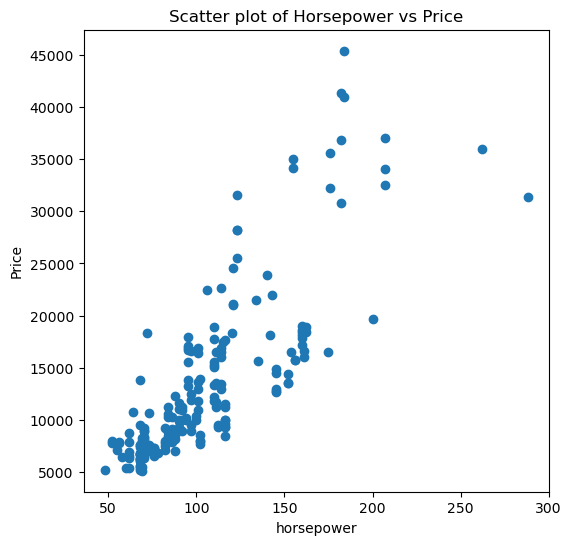

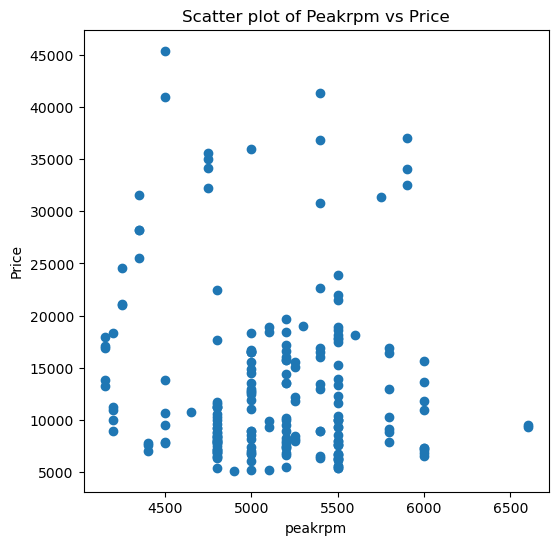

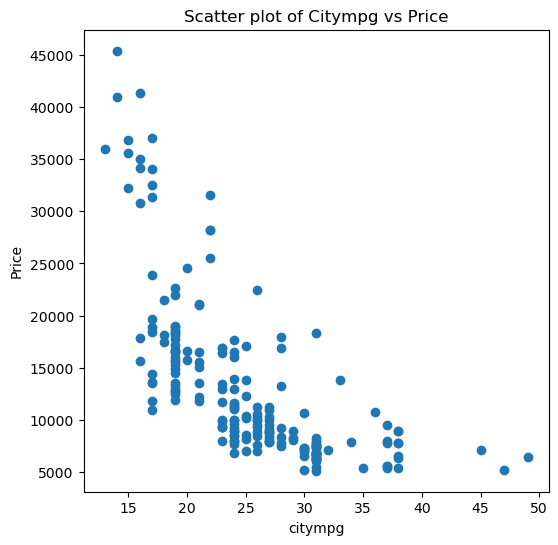

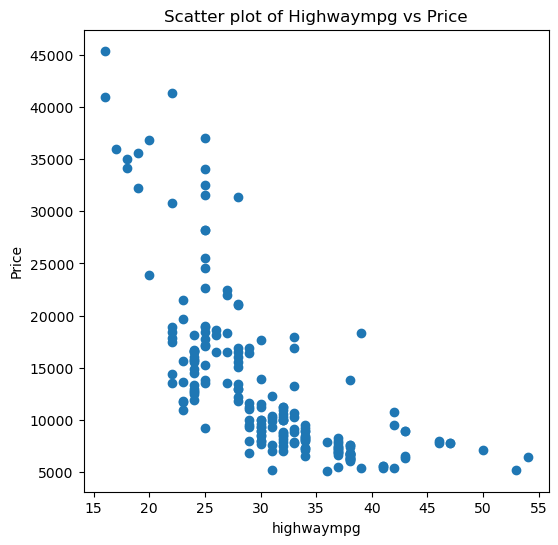

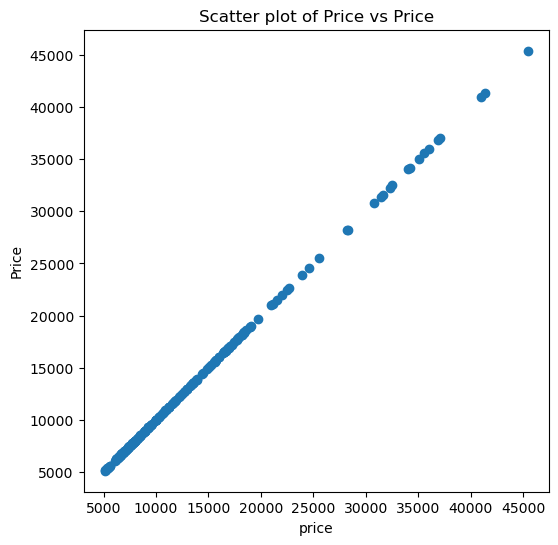

In [22]:
# Relationship visualization
for col in numerical_cols:
    plt.figure(figsize=(6, 6))
    plt.scatter(enc_df[col], enc_df['price'])
    plt.title(f'Scatter plot of {col.title()} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [23]:
# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,67,0,60,0,0,0,3,2,0,104.9,...,2,134,3,3.43,3.64,22.0,72,4200,31,39
111,112,0,85,1,0,0,3,2,0,107.9,...,2,120,5,3.46,2.19,8.4,95,5000,19,24
153,154,0,121,1,0,0,4,1,0,95.7,...,2,92,1,3.05,3.03,9.0,62,4800,31,37
96,97,1,76,1,0,0,3,1,0,94.5,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
38,39,0,41,1,0,1,2,1,0,96.5,...,2,110,0,3.15,3.58,9.0,86,5800,27,33


In [25]:
# Initialize Linear Regression object
lr = LinearRegression()

In [26]:
# Train the model
lr.fit(X_train, y_train) # y = ax + b where, a = slope(coef_) and b = intercept(intercept_)

LinearRegression()

In [27]:
# Print the slope
lr.coef_

array([[ 1.96695473e+01,  1.66699545e+02, -5.51231065e+01,
         9.87818467e+03,  1.08184759e+03, -1.53977797e+03,
        -1.12767527e+03,  8.02669198e+02,  1.15129385e+04,
         1.75995013e+02, -6.15746881e+01,  5.80762644e+02,
         2.05252222e+02,  2.81201584e+00,  2.35693477e+02,
        -1.05010013e+02,  7.87456838e+01,  1.02898868e+02,
        -7.38681211e+02, -1.95161560e+03,  8.47219397e+02,
         1.81854418e+01,  1.37307002e+00, -1.75134014e+02,
         1.05454430e+02]])

In [28]:
# Print the intercept
lr.intercept_

array([-72955.93068193])

In [37]:
# Predict on test data using the model
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
train_mse = mean_squared_error(y_pred_train, y_train)
test_mse = mean_squared_error(y_pred_test, y_test)

train_r2 = r2_score(y_pred_train, y_train)
test_r2 = r2_score(y_pred_test, y_test)

In [46]:
print(f"""
Train MSE: {train_mse}
Test MSE: {test_mse}

Train R2 Score: {train_r2}
Test R2 Score: {test_r2}
""")


Train MSE: 5346263.283511488
Test MSE: 12306121.302934507

Train R2 Score: 0.9015268322591198
Test R2 Score: 0.8157782951566289



#### Visualizations

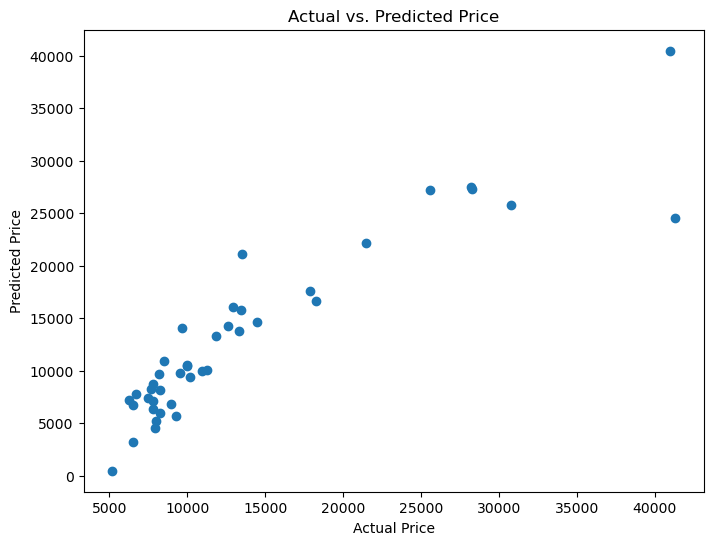

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()